In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import sklearn as sklearn
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

## Задание 0 Корреляции в случайных данных

Как Вам рассказали на лекции - в большом количество случайных данных почти всегда можно найти корреляции. Давайте это проверим!

Пусть у нас есть 5000 случайных величин $X_i$ подчиняющихся нормальному распределению $N(0,1)$. Давайте семплируем по 40 значений для каждой из них. Для этого воспользуйтесь функцией np.random.normal

Разбейте полученные значения для каждой случайной величины на выборку для обучения и на тестовую в соотношении 1 к 1. У Вас должны в итоге получиться две матрицы статистик A, B с размерностями (5000 x 20) и (5000 x 20)

Подсчитайте на основе полученных статистик из матрицы A матрицу корреляций для случайных величин. Должна получиться матрица 5000 * 5000. Используйте функцию np.corrcoef.

Замените диагональные элементы на нули и найдите в полученной матрице максимальное значение. Строка i и столбец j соответствуют случайным величинам $X_i X_j$ для семплированных данных которых корреляция оказалась наивысшей. Отобразите значения X_i X_j на графике. Выведите значения наибольшой корреляции

In [23]:
from sklearn.model_selection import train_test_split
X = np.random.normal(0, 1, size=(10000, 20))
A, B = train_test_split(X, test_size=0.5, random_state=33)

max correlation 0.8689549681719665


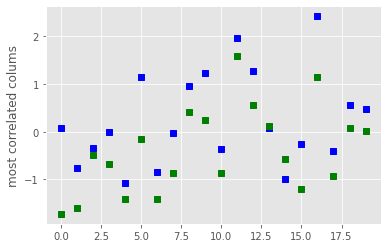

In [24]:
corr_A = np.corrcoef(A) #матрица корреляций
corr_A = corr_A - np.diag(np.diag(corr_A)) # матрица корреляций с нулевой диагональю
print('max correlation A', np.max(corr_A)) #максимальная корреляция
max_coord_A = np.unravel_index(np.argmax(corr_A), corr_A.shape) #координаты максимально коррелирующих столбцов
plt.plot(A[max_coord_A[0]], 'bs', A[max_coord_A[1]], 'gs')
plt.ylabel('most correlated colums')
plt.show()

Очевидно, что никакой причинно следственной связи в этом нет. Давайте в этом убедимся. Для этого подсчитайте и выведите значение корреляции между X_i и X_j на основе данных их матрицы B. Используйте функцию scipy.stats.pearsonr Отобразите значения найденных переменных X_i и X_j из матрицы B. У Вас должна получиться очень маленькая корреляция (мб даже отрицательная)

In [26]:
from scipy.stats import pearsonr

corr_B = np.corrcoef(B) #матрица корреляций
corr_B = corr_B - np.diag(np.diag(corr_B)) # матрица корреляций с нулевой диагональю
print('max correlation B', np.max(corr_B)) #максимальная корреляция
max_coord_B = np.unravel_index(np.argmax(corr_A), corr_A.shape) #координаты максимально коррелирующих столбцов
print(pearsonr(B[max_coord_B[0]],B[max_coord_B[1]]))

max correlation B 0.9011207631103458
(-0.09261352116424233, 0.6977586160593798)


## Задание 1 Iris Dataset

Примените PCA к датасету Iris. Отобразите проекцию данных на две главные компоненты. 

Загрузку датасета можно проводить функцией iris = sklearn.datasets.load_iris()

Доступ к данным идет посредством обращения к ключу iris.data, доступ к разметке классов через iris.target

Во время отображения на scatter обозначьте разными цветами метки принадлежашие разным классам(iris.target)

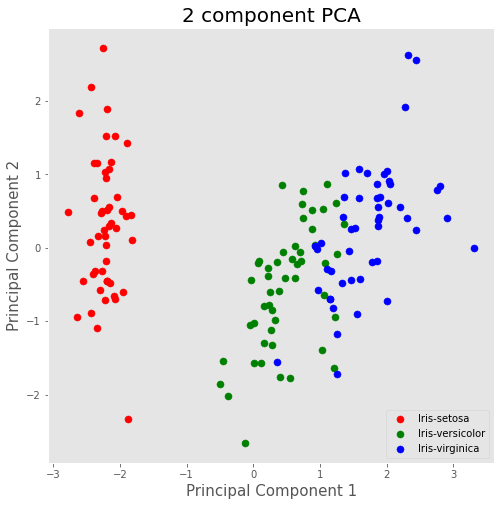

In [98]:
# решение с ресурса https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 с использованием фрейма pandas
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target']) #загружаем датасет
features = ['sepal length', 'sepal width', 'petal length', 'petal width'] #выделяем свойства
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x) #стандартизируем данные
pca = PCA(n_components=2) # выделяем две главные компоненты
principalComponents = pca.fit_transform(x) 
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1) #Конкатенация DataFrame вдоль оси = 1 ("приклеиваем" target к двум главным компонентам)
#Строим график
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

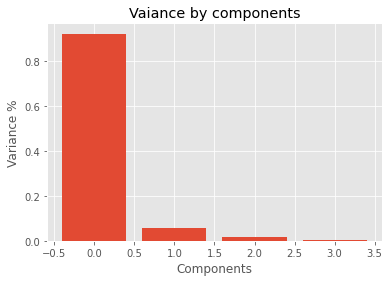

In [34]:
#А тут построим главные компоненты, первая, очевидно, превалирует 
plt.bar(range(iris_pca.explained_variance_ratio_.shape[0]),iris_pca.explained_variance_ratio_)
plt.title('Vaiance by components')
plt.xlabel('Components')
plt.ylabel('Variance %')
plt.show()

## Задание 2

Выберите две такие матрицы ковариаций, чтобы для одной из них эллипс был повернут по часовой стрелке, а для другой - против часовой. Постройте их в рамках одной фигуры (то есть, создайте ax1, ax2 при вызове subplots). Подпишите оси координат x1 и x2. Постройте истинные компоненты, постройте PCA компоненты. 
Для отрисовки можно использовать функцию plot_components_vector как было на уроке

In [66]:
# function for vector plotting
def plot_components_vector(ax, data, vector, color, label="", delta=0.5):
    limits_x = [np.min(data[:,0])-delta, np.max(data[:,0])+delta]
    limits_y = [np.min(data[:,1])-delta, np.max(data[:,1])+delta]
    
    if np.fabs(vector[1]) > 1e-5:
        if np.fabs(vector[0]) > 1e-5:
            x = np.arange(*limits_x, 0.1)
            y = x * vector[1]/vector[0]
        else:
            y = np.arange(*limits_y, 0.1)
            x = np.full_like(y, 0)
    else:
        x = np.arange(*limits_x, 0.1)
        y = np.full_like(x, 0)
        
    ax.plot(x, y, color=color, label=label)

In [67]:
import scipy
#Возьму произвольный датасет из многомерного нормального распределения с ковариантной матрицей C, как было на лекции
mu = np.zeros(2)
C_simple = np.array([[4,0],
              [0,2]])

data_simple = np.random.multivariate_normal(mu, C_simple, size=300)
# Повернутый по часовой стрелке датасет:
C_right = np.array([[4, 2], 
              [2, 2]])
data_right = np.random.multivariate_normal(mu, C_right, size=300)
#Повернутый против часовой стрелки датасет:
C_left = np.array([[4, -2], 
              [-2, 2]])
data_left = np.random.multivariate_normal(mu, C_left, size=300)
#Собственные вектора и значения для всех трех датасетов:
eigen_values_simple, eigen_vectors_simple = np.linalg.eig(C_simple)
eigen_values_right, eigen_vectors_right = np.linalg.eig(C_right)
eigen_values_left, eigen_vectors_left = np.linalg.eig(C_left)

eigen_vectors_simple = eigen_vectors_simple.T
eigen_vectors_right = eigen_vectors_right.T
eigen_vectors_left = eigen_vectors_left.T

# PCA для всех трех
pca_simple = sklearn.decomposition.PCA()
pca_simple.fit(data_simple)

pca_right = sklearn.decomposition.PCA()
pca_right.fit(data_right)

pca_left = sklearn.decomposition.PCA()
pca_left.fit(data_left)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

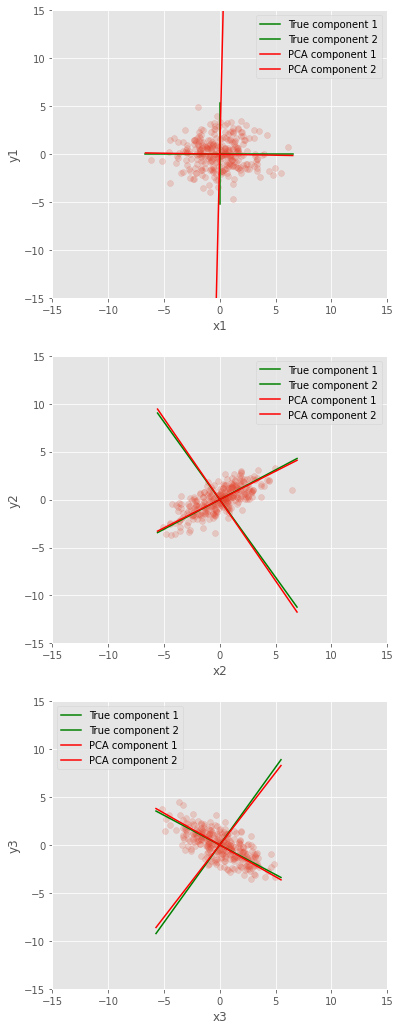

In [76]:
fig, (ax0, ax1, ax2) = plt.subplots(3, figsize = (6, 18)) #общий график с тремя подграфиками

ax0.scatter(data_simple[:,0], data_simple[:,1], alpha=0.2) #сами точечки датасета
plot_components_vector(ax0, data_simple, eigen_vectors_simple[0], 'g', 'True component 1') #истинные компоненты
plot_components_vector(ax0, data_simple, eigen_vectors_simple[1], 'g', 'True component 2')

plot_components_vector(ax0, data_simple, pca_simple.components_[0], 'r', 'PCA component 1') #PCA компоненты
plot_components_vector(ax0, data_simple, pca_simple.components_[1], 'r', 'PCA component 2')

s=15; ax0.set(xlim=(-s, s), ylim=(-s, s)) #пределы осей
ax0.legend() #Легенда
ax0.set(xlabel='x1', ylabel='y1') #Подписи осей

#Дальше все то же самое для повернутых графиков
ax1.scatter(data_right[:,0], data_right[:,1], alpha=0.2)
plot_components_vector(ax1, data_right, eigen_vectors_right[0], 'g', 'True component 1')
plot_components_vector(ax1, data_right, eigen_vectors_right[1], 'g', 'True component 2')

plot_components_vector(ax1, data_right, pca_right.components_[0], 'r', 'PCA component 1')
plot_components_vector(ax1, data_right, pca_right.components_[1], 'r', 'PCA component 2')

s=15; ax1.set(xlim=(-s, s), ylim=(-s, s))
ax1.legend()
ax1.set(xlabel='x2', ylabel='y2')

ax2.scatter(data_left[:,0], data_left[:,1], alpha=0.2)
plot_components_vector(ax2, data_left, eigen_vectors_left[0], 'g', 'True component 1')
plot_components_vector(ax2, data_left, eigen_vectors_left[1], 'g', 'True component 2')

plot_components_vector(ax2, data_left, pca_left.components_[0], 'r', 'PCA component 1')
plot_components_vector(ax2, data_left, pca_left.components_[1], 'r', 'PCA component 2')
ax2.legend()
s=15; ax2.set(xlim=(-s, s), ylim=(-s, s))
ax2.set(xlabel='x3', ylabel='y3')
plt.show()

## Задание 3 Ручное уменьшение размерности признаков посредством анализа дисперсии данных вдоль главных компонент

Рассмотрим ещё один набор данных размерности $D$, чья реальная размерность значительно меньше наблюдаемой (назовём её также $d$). От вас требуется:

1. Построить модель PCA с $D$ главными компонентами по этим данным.
2. Спроецировать данные на главные компоненты.
3. Оценить их дисперсию вдоль главных компонент.
4. Отсортировать дисперсии в порядке убывания и получить их попарные разности: $\lambda_{(i-1)} - \lambda_{(i)}$.
5. Найти разность с наибольшим значением и получить по ней оценку на эффективную размерность данных $\hat{d}$.
6. Построить график дисперсий и убедиться, что полученная оценка на $\hat{d}_{opt}$ действительно имеет смысл, после этого внести полученное значение $\hat{d}_{opt}$ в файл ответа.

Для построения модели PCA используйте функцию:

    model.fit(data)
    
Для трансформации данных используйте метод:

    model.transform(data)
    
Оценку дисперсий на трансформированных данных от вас потребуется реализовать вручную. Для построения графиков можно воспользоваться функцией

    plot_variances(d_variances)
    
которой следует передать на вход отсортированный по убыванию вектор дисперсий вдоль компонент.

In [77]:
!wget http://edunet.kea.su/repo/src/L04_Feature_Engineering/materials/data_task2.csv

--2021-02-19 11:30:23--  http://edunet.kea.su/repo/src/L04_Feature_Engineering/materials/data_task2.csv
Resolving edunet.kea.su (edunet.kea.su)... 188.44.49.115
Connecting to edunet.kea.su (edunet.kea.su)|188.44.49.115|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://edunet.kea.su/repo/src/L04_Feature_Engineering/materials/data_task2.csv [following]
--2021-02-19 11:30:24--  https://edunet.kea.su/repo/src/L04_Feature_Engineering/materials/data_task2.csv
Connecting to edunet.kea.su (edunet.kea.su)|188.44.49.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4529433 (4.3M) [text/csv]
Saving to: ‘data_task2.csv’

data_task2.csv      100%[===================>]   4.32M  1.39MB/s    in 3.1s    

2021-02-19 11:30:27 (1.39 MB/s) - ‘data_task2.csv’ saved [4529433/4529433]



In [81]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()

data = pd.read_csv('data_task2.csv')

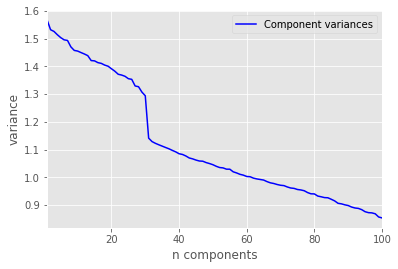

30


In [92]:
model = PCA()
model.fit(data)
model.transform(data)
variances = np.std(t_data, axis = 0) #Оценка дисперсии стандартным методом numpy
plot_variances(variances)
diff = variances[:-1] - variances[1:]
best = np.argmax(diff) + 1
print(best) #Количество главных компонент всего 30 из 100

# Задание №4 Распознавание лиц (дополнительное)

Используя датасет 
и код из лекции реализуйте простую системму распознавания лиц.
Найдите в датасете занменитость фотография  которой встречается больше 2 раз (например Arnold_Schwarzenegger) и тестируйте алгоритм на ее фотографиях.

Используя embedding сгенерированный при помощи PCA попробуйте найдите остальные фотографии актера. 
Для сравнения используйте метод KNN рассмотренный в первой лекции.

Оцените точность модели. Отдельно оцениете количество ошибок 1-го и 2го рода.

Для ускорения отладки используйте чать датасета



In [ ]:
# Copy code from lecture here
# ...
# you must have photos in images array and names in celebrity_names

wanted,_ = create_embedding( photo_of_my_favorite_celebrity, 200) # 200 -number of components you can replace this value

# Store embeddings in memory 

# Comapare wanted against all outher embeddings


#Задание №5 (дополнительное)

Проведите Feature Engineering на датесете связанным с вашей научной работой. 


In [ ]:
# PLACE YOUR CODE HERE